# Hotel Booking Cancellation Prediction
## Aryan Singh D002
## Bhavyam Ramani D003

## **Importing the libraries required**

In [3]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

## **Loading the dataset**

In [6]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [8]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

## **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [12]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [14]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Understand the shape of the dataset**

In [17]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns. 

### **Check the data types of the columns for the dataset**

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

### **Dropping duplicate values**

In [25]:
# checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

### **Dropping the unique values column**

**Let's drop the Booking_ID column first before we proceed forward**, as a column with unique values will have almost no predictive power for the Machine Learning problem at hand.

In [30]:
data = data.drop(["Booking_ID"], axis=1)

In [32]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**Let's check the statistical summary of the data.**

In [35]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## **Exploratory Data Analysis**

In [38]:
def hist_box(data, col):
    fig, (ax_box, ax_hist) = plt.subplots(
        2, 
        sharex=True, 
        gridspec_kw={'height_ratios': (0.15, 0.85)}, 
        figsize=(12, 6)
    )
    sns.boxplot(data[col], ax=ax_box, showmeans=True, color='skyblue', orient='h')
    ax_box.set(xlabel='')  # Remove x-axis label for the boxplot    
    sns.histplot(data[col], ax=ax_hist, kde=True, color='blue')  # Replace sns.distplot
    plt.tight_layout()
    plt.show()

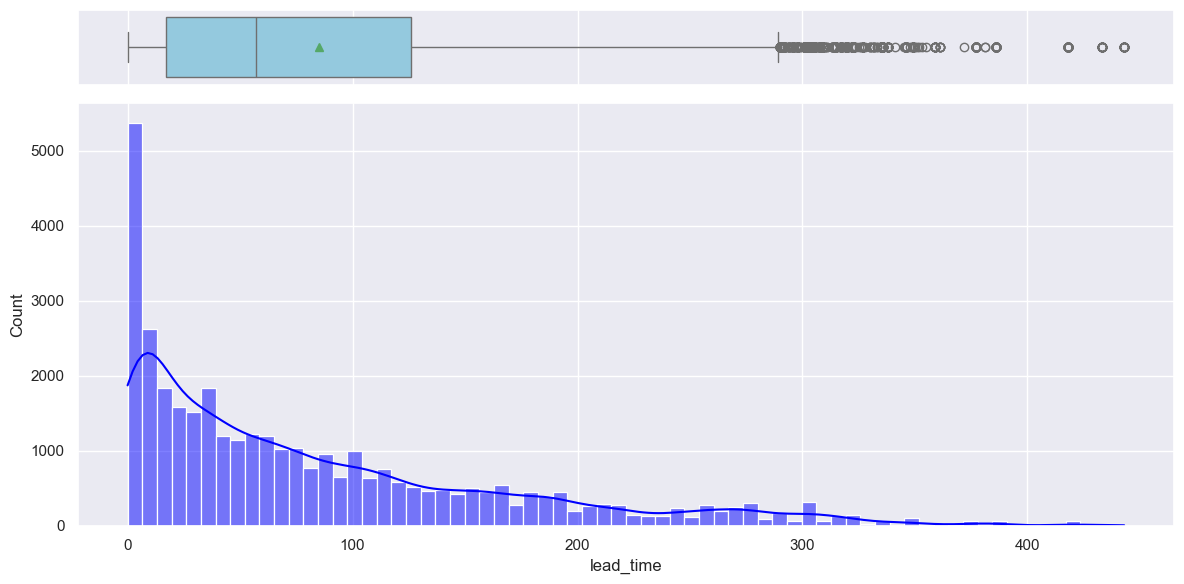

In [40]:
hist_box(data, 'lead_time')

-   Considering the histogram, majority of customers prefer less lead
    time, who had pre-booked the hotel room.
-   There are only a few customers who has a long lead time.
-   The boxplot shows that there are some outliers after approximately
    270.
-   Most of the values are concentrated between 0-100.
-   The Lower quartile and Upper quartile values are approximately 10
    and 120.

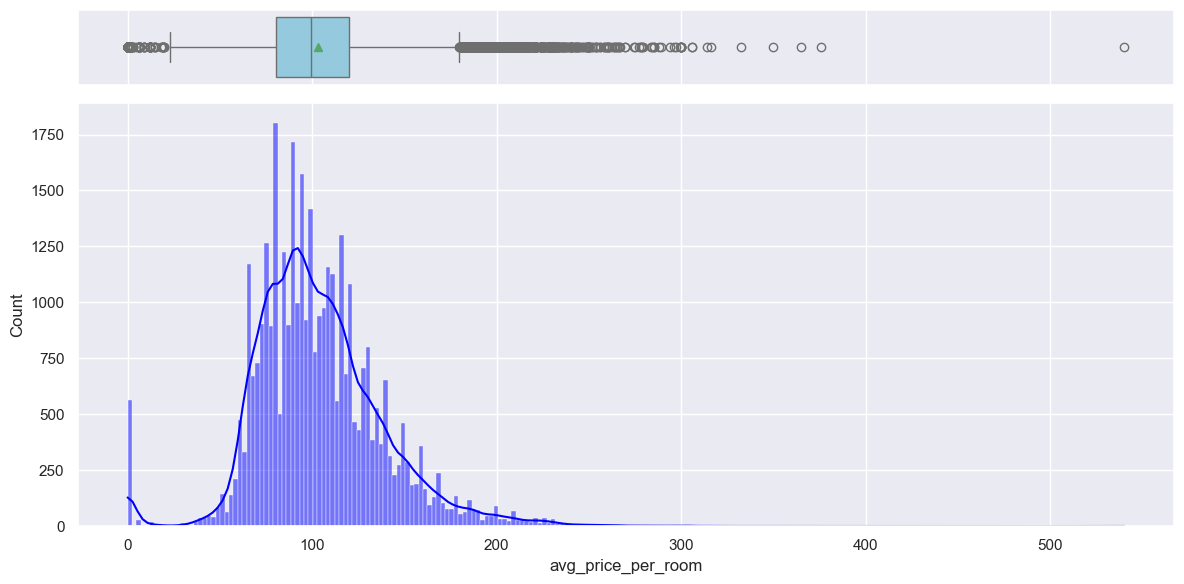

In [43]:
# Remove _________ and complete the code
hist_box(data, "avg_price_per_room")

In [44]:
data[data["avg_price_per_room"] == 0]  #There are quite a few hotel rooms which have a price equal to 0.
# In the market segment column, it looks like many values are complementary.

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


In [47]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service from the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [50]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [52]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### **Let's understand the distribution of the categorical variables**

**Number of Children**

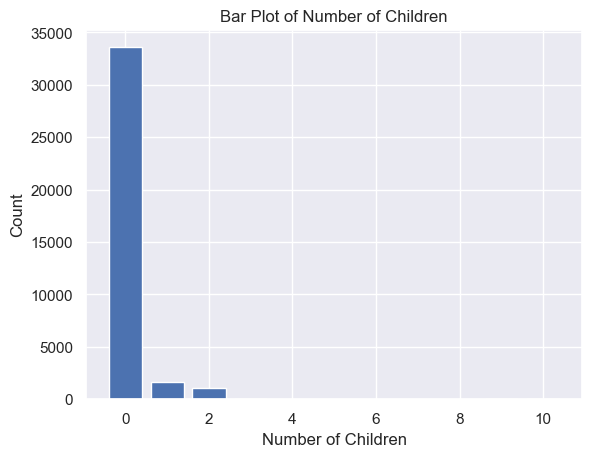

In [56]:
counts = data['no_of_children'].value_counts()

# Plot with matplotlib
plt.bar(counts.index, counts.values)
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Bar Plot of Number of Children")
plt.show()

In [58]:
data['no_of_children'].value_counts(normalize=True)

no_of_children
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: proportion, dtype: float64

* Customers were not travelling with children in 93% of cases.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [61]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

**Arrival Month**

C:\Users\HP\AppData\Local\Temp\ipykernel_11816\1951909771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="arrival_month", y="count", data=arrival_month_counts, palette="viridis")


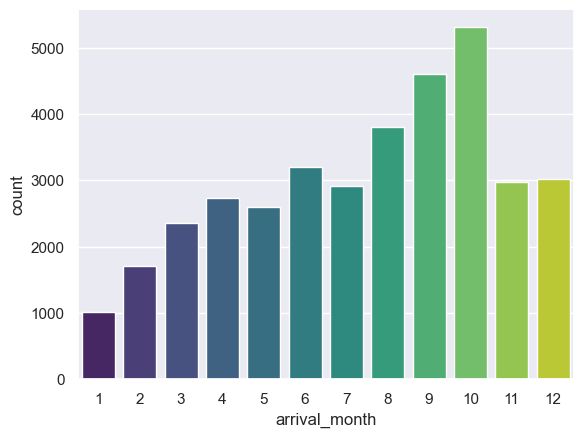

In [64]:
arrival_month_counts = data["arrival_month"].value_counts().reset_index()
arrival_month_counts.columns = ["arrival_month", "count"]

sns.barplot(x="arrival_month", y="count", data=arrival_month_counts, palette="viridis")
plt.xticks(rotation=0)  # Rotate labels if necessary
plt.show()

In [66]:
data['arrival_month'].value_counts(normalize=True)

arrival_month
10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: proportion, dtype: float64

* October is the busiest month for hotel arrivals followed by September and August. **Over 35% of all bookings**, as we see in the above table, were for one of these three months.
* Around 14.7% of the bookings were made for an October arrival.

**Booking Status**

C:\Users\HP\AppData\Local\Temp\ipykernel_11816\263521650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="booking_status", y="count", data=booking_status_counts, palette="coolwarm")


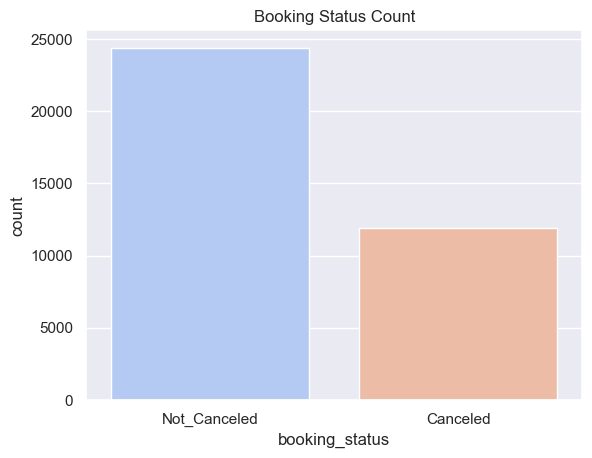

In [70]:
booking_status_counts = data["booking_status"].value_counts().reset_index()
booking_status_counts.columns = ["booking_status", "count"]

# Plot with sns.barplot
sns.barplot(x="booking_status", y="count", data=booking_status_counts, palette="coolwarm")
plt.title("Booking Status Count")
plt.show()

In [71]:
data['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

* 32.8% of the bookings were canceled by the customers.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [76]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

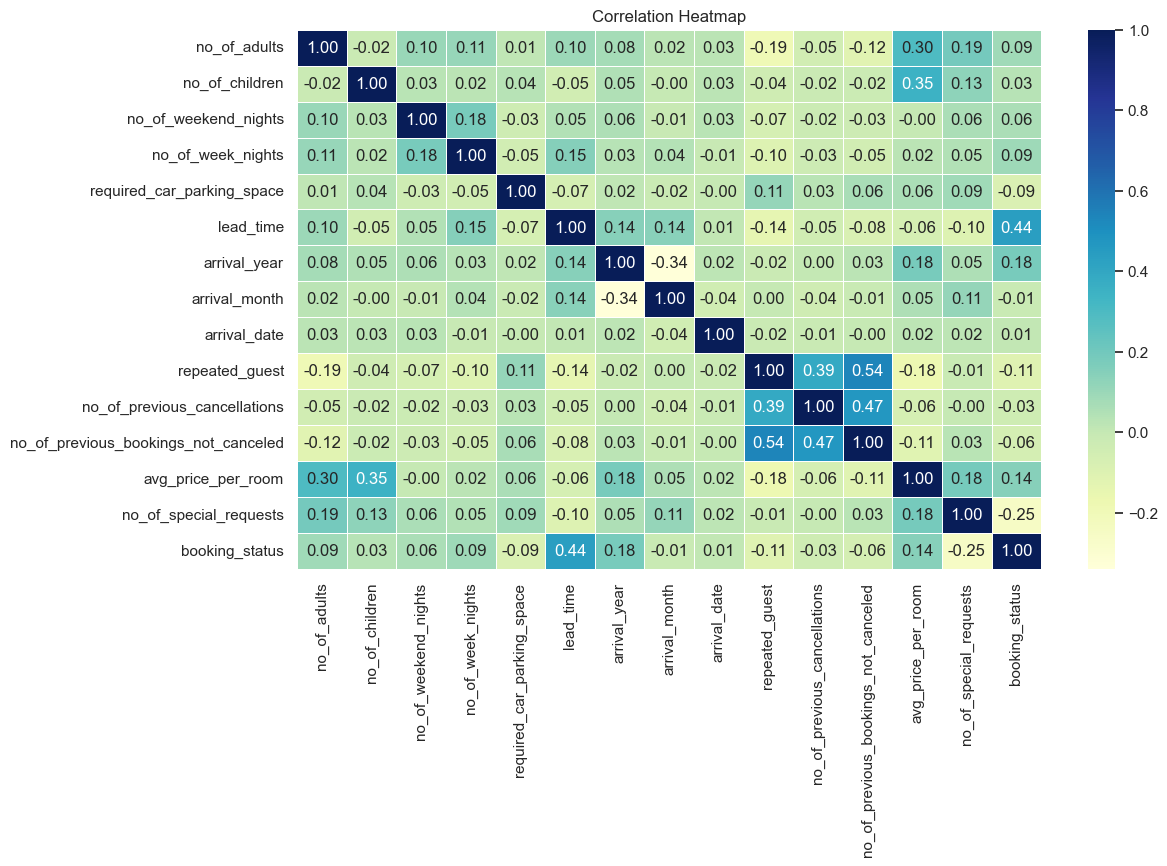

In [78]:
numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

# Compute the correlation matrix for numeric columns
corr_matrix = data[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- The heatmap shows a positive correlation among itself. We see that there is a positive correlation of 0.54 between 'no. of previous bookings not cancelled' and 'repeated guests'.
- 'Booking Status' and 'Lead time' have a correlation of 0.44, which is also positive.
- This means that the 'number of previous bookings not cancelled' linearly increases with 'repeated guest'. Likewise, we have to check and infer from the correlation between all of the variables taken two at a time.

C:\Users\HP\AppData\Local\Temp\ipykernel_11816\1991213708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


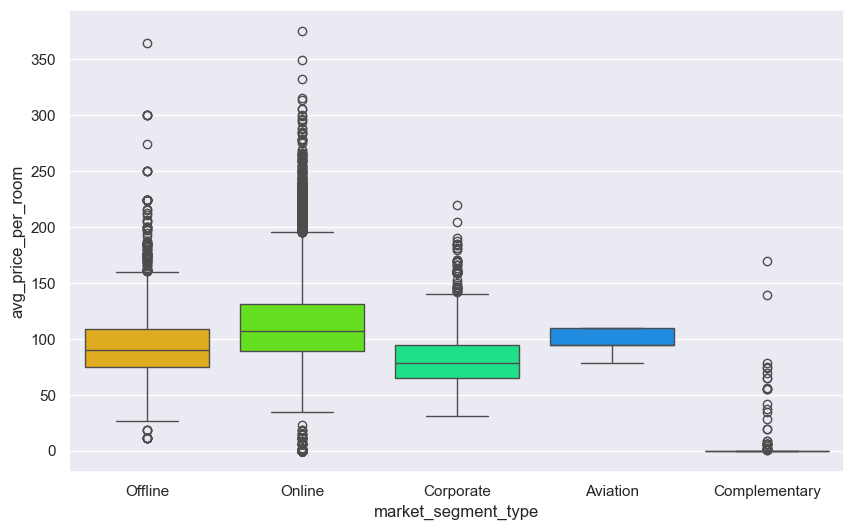

In [80]:
# how prices vary across different market segments
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.

In [83]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

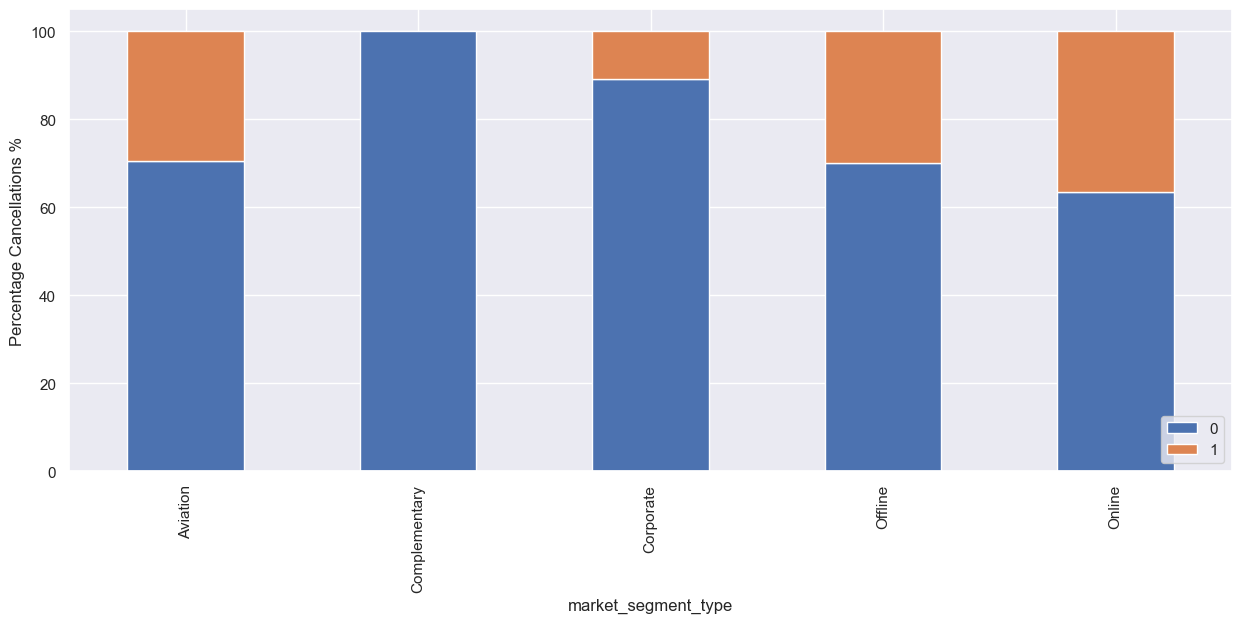

In [86]:
stacked_barplot(data, "market_segment_type", "booking_status",figsize=(15,6))

We can see that People booking offlineg6 have a 30% cancellation rate.
There are more cancellations for online booking than for offline bookings.

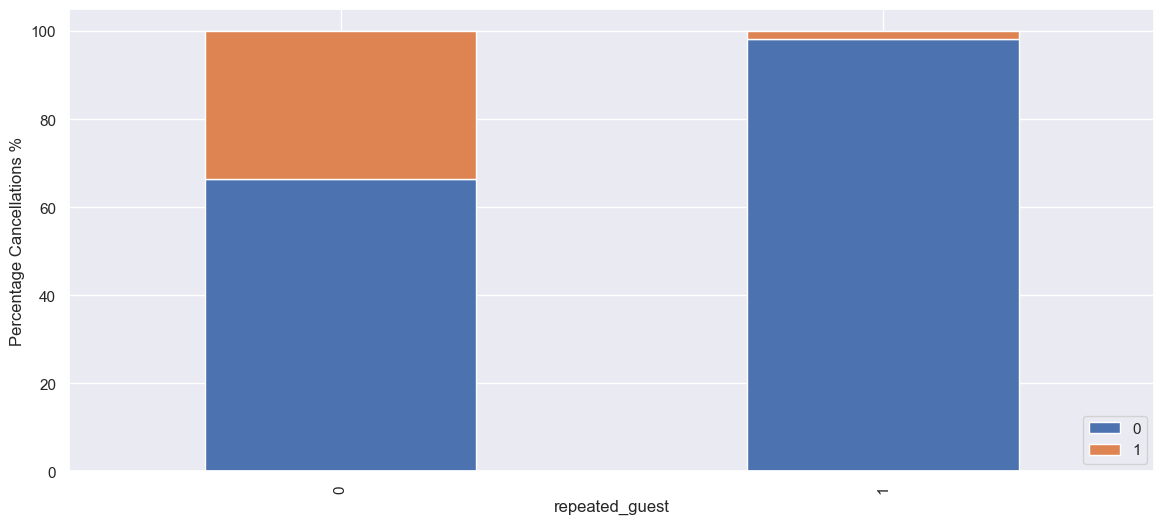

In [89]:
#REpeated customers
stacked_barplot(data, "repeated_guest" , "booking_status", figsize=(14,6))

C:\Users\HP\AppData\Local\Temp\ipykernel_11816\1164523401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])


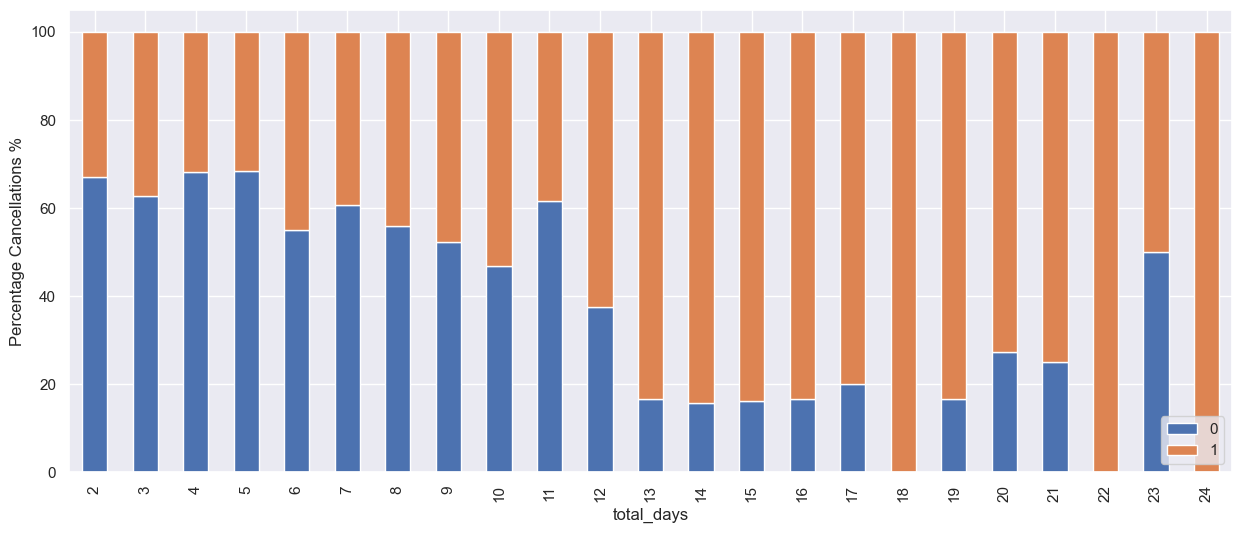

In [91]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.

C:\Users\HP\AppData\Local\Temp\ipykernel_11816\754474988.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)


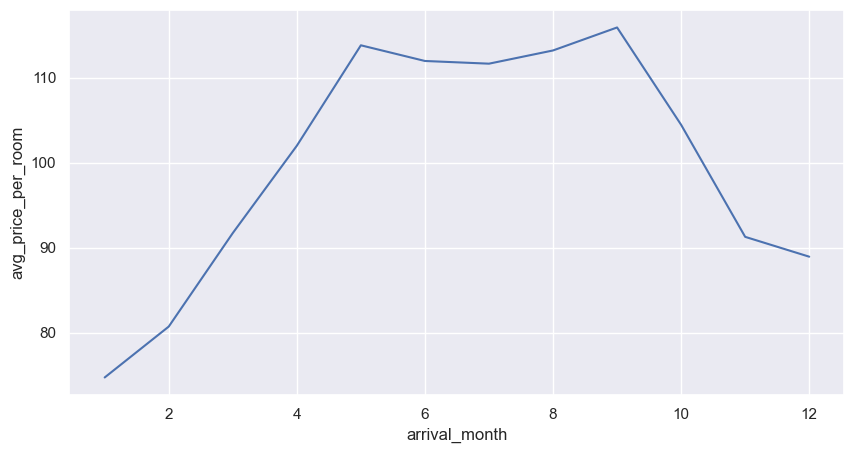

In [94]:
# As hotel room prices are dynamic, Let's see how the prices vary across different months
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## **Data Preparation for Modeling**

#### Separating the independent variables (X) and the dependent variable (Y)

In [99]:
# Separating the independent variables (X) and the dependent variable (Y)
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

#### **Splitting the data into a 70% train and 30% test set**
Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [102]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [104]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0    0.672377
1    0.327623
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.672333
1    0.327667
Name: proportion, dtype: float64


**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [107]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**
We will be building 2 different models:
- **Logistic Regression**
- **Support Vector Machine (SVM)**

## **Logistic regression**

In [111]:
# Fitting logistic regression model
lg =LogisticRegression()
lg.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     17073
           1       0.73      0.59      0.65      8319

    accuracy                           0.79     25392
   macro avg       0.77      0.74      0.75     25392
weighted avg       0.79      0.79      0.79     25392



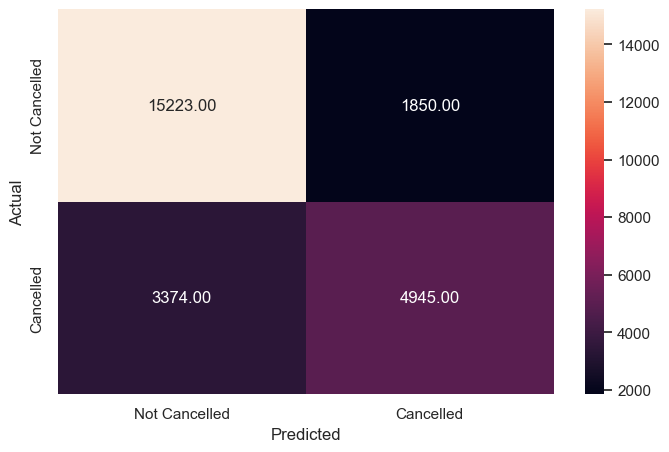

In [113]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

- True Negative (Actual=0, Predicted=0): Model predicts that a customer would not cancel booking and the customer does not cancel.
- False Positive (Actual=0, Predicted=1): Model predicts that a customer would cancel booking but the customer does not cancel.
- False Negative (Actual=1, Predicted=0): Model predicts that a customer would not cancel booking but the customer cancels.
- True Positive (Actual=1, Predicted=1): Model predicts that a customer would cancel booking and the customer actually cancels.

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7317
           1       0.72      0.59      0.65      3566

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.78      0.79      0.78     10883



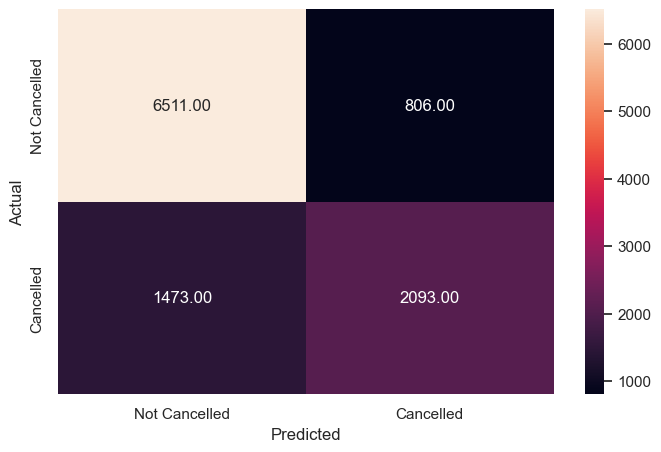

In [116]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

- We are getting an **accuracy of around 82%** on train and test dataset.
- However, the **recall for this Model is only around 59% for class1 on train and 60% on test.**
- As the recall is low, **this model will not perform well** in differentiating out those customers who have a high chance of cancelling the booking.
- As we can see from the Confusion Matrix, **this model fails to identify the majority of customers who will cancel the booking.**

### **Find the optimal threshold for the model using the Precision-Recall Curve.**

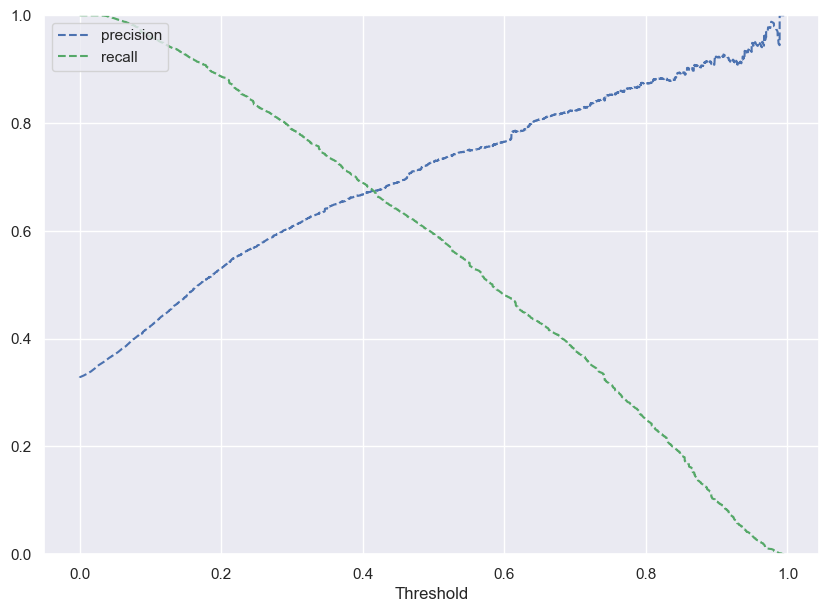

In [120]:
# Predict_proba gives the probability of each observation belonging to each class
# Let's use the Precision-Recall curve and see if we can find a better threshold.
from sklearn.metrics import precision_recall_curve

y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

We can see that precision and recall are balanced for a threshold of about ~0.42.

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17073
           1       0.67      0.66      0.67      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.75      0.76     25392
weighted avg       0.78      0.79      0.78     25392



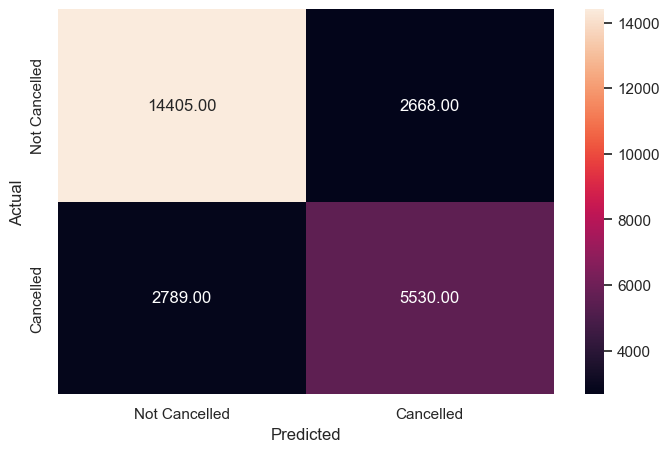

In [123]:
# Setting the optimal threshold
optimal_threshold =.42
y_pred_train = lg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

- The model performance has improved. The recall has increased slightly for train class 1 for train data.

Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      7317
           1       0.67      0.66      0.66      3566

    accuracy                           0.78     10883
   macro avg       0.75      0.75      0.75     10883
weighted avg       0.78      0.78      0.78     10883



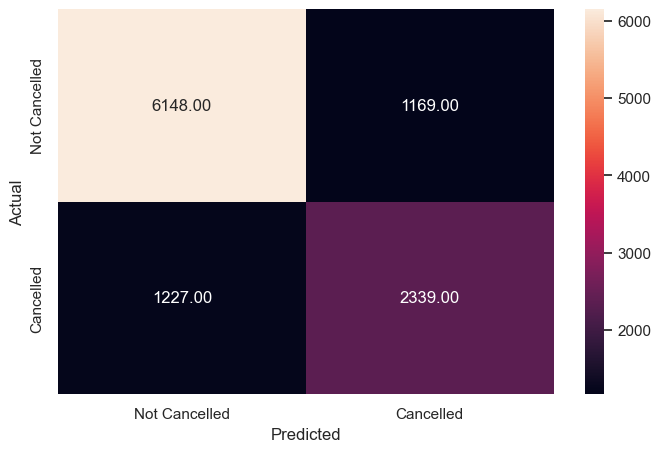

In [127]:
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

- The model is giving similar performance on the test and train data.
- The recall of the test data has mildly increased while the precision remains same.
- The average recall and precision for the model are good.

### **Support Vector Machines**

To accelerate SVM training, let's scale the data for support vector machines.

In [132]:
# Scaling data 
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.**Linear Kernel** \
2.**RBF Kernel**

### **SVM Using a linear kernel**

In [136]:
svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X = X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.79      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392



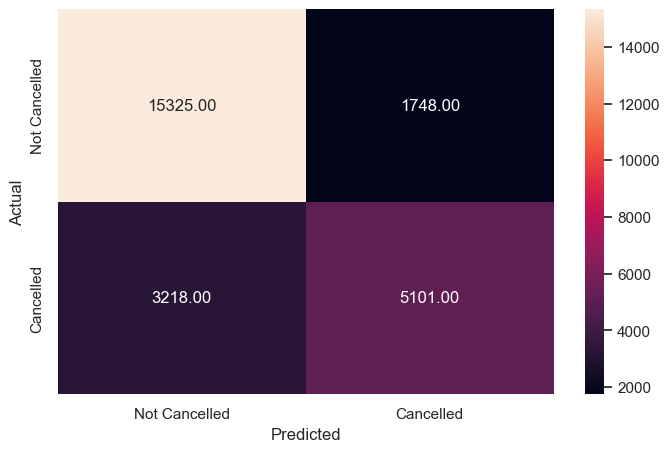

In [137]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

- SVM model with linear kernel is not overfitting as the accuracy is around 83% for train dataset.
- The Recall for the model is around 61% which is quite good but it can be improved.

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



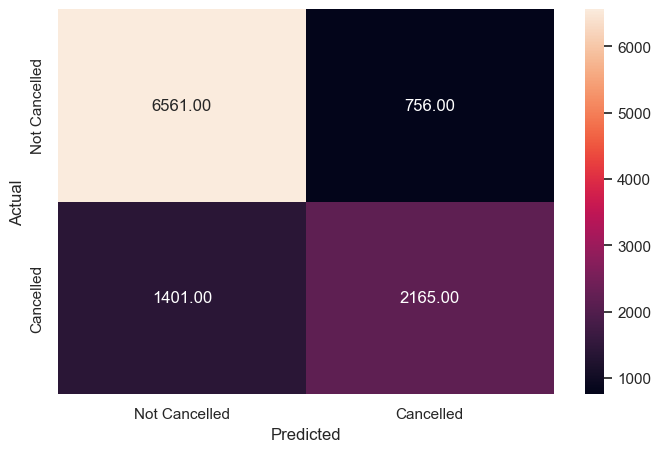

In [141]:
# Checking accuracy on test set
y_pred_test_svm = model.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

- SVM model with linear kernel is not overfitting as the accuracy is around 82% for test dataset.
- The Recall for the model is around 61% which is quite good but it can be improved.

### **Finding the optimal threshold for the model using the Precision-Recall Curve.**

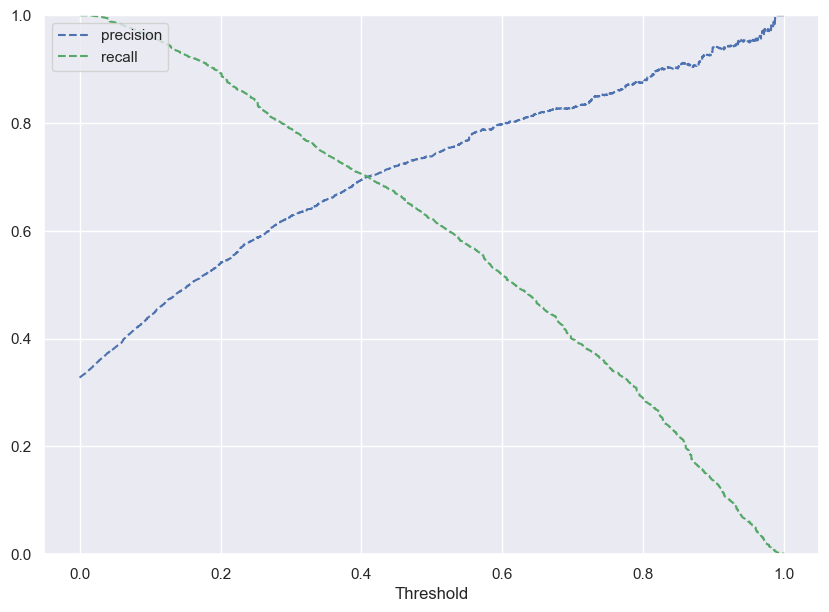

In [145]:
# optimal threshold for the model using the Precision-Recall Curve
# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

We can see that the optimal threshold of the model from the Precision-Recall curve is 0.41.

In [148]:
optimal_threshold_svm=0.41

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     17073
           1       0.70      0.70      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



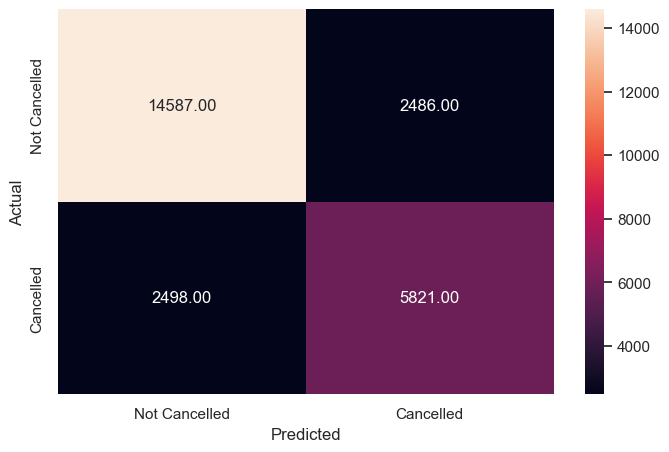

In [150]:
# Check the performance of the model on train and test data using the optimal threshold
y_pred_train = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

- The accuracy increased to 85% for class 0.
- The f1 score, precision and recall has increased slightly than before.

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7317
           1       0.69      0.70      0.69      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.80      0.80      0.80     10883



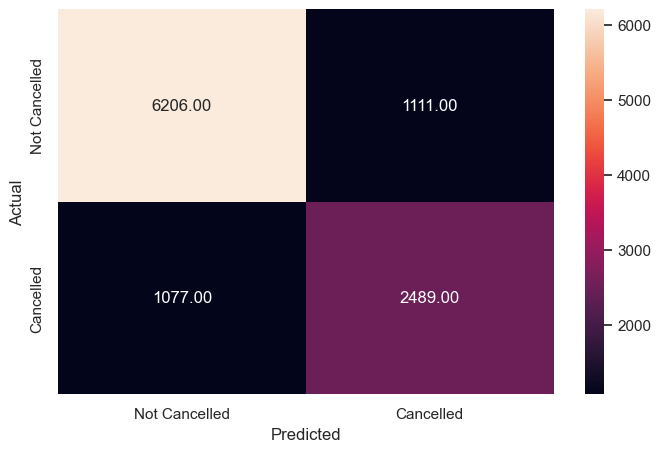

In [153]:
# Checking test accuracy
y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

- At the optimal threshold of .41, the model performance has improved significantly. The recall has improved from 0.61 to .70 which is a ~10% increase and the model is giving good generalized results.
- As the recall is high, this model will perform well in differentiating out those customers who have a high chance of cancelling the bookings.

### **SVM using an RBF kernel**

In [157]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled, y_train)

SVC(probability=True)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     17073
           1       0.79      0.65      0.71      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.78      0.80     25392
weighted avg       0.82      0.83      0.82     25392



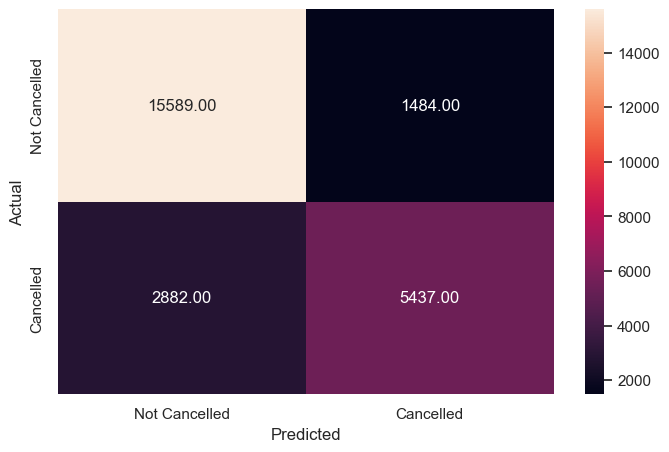

In [159]:
y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

- The training model has recall of .65 in class 1 and a precision of .79
- The recall can be improved for better results.

### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



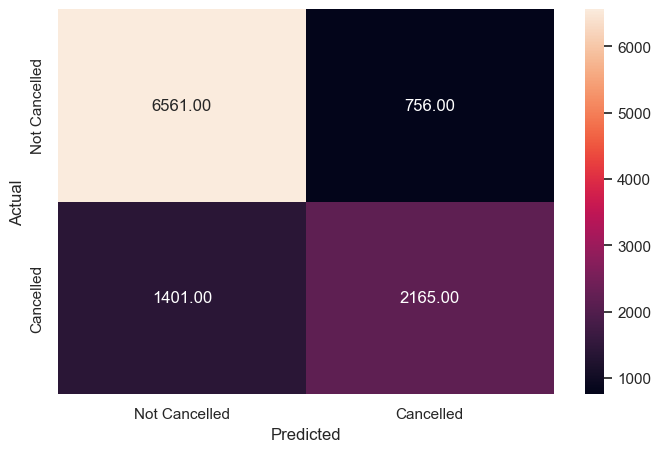

In [163]:
y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

- For the test dataset recall is .61, it is quite low for good predictions.

### **Finding optimal threshold**

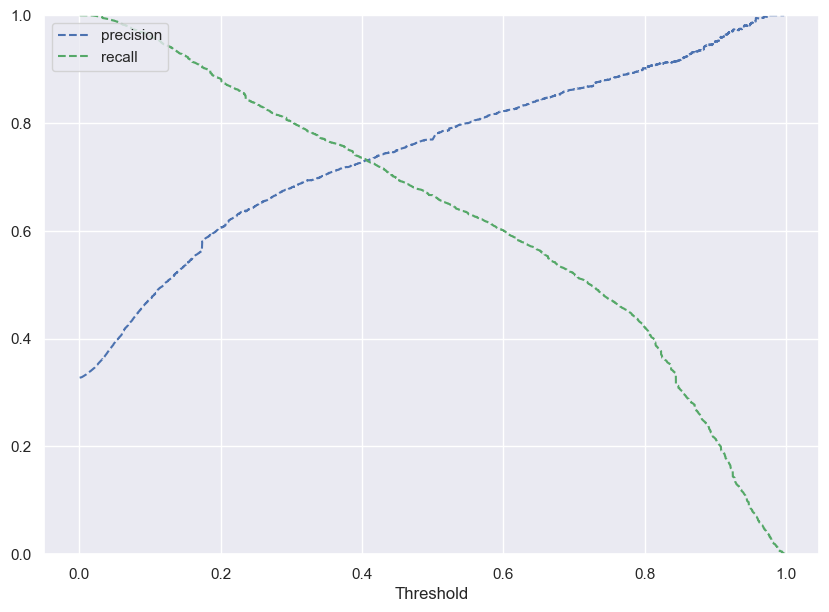

In [167]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [169]:
optimal_threshold_svm=0.4

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     17073
           1       0.69      0.71      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



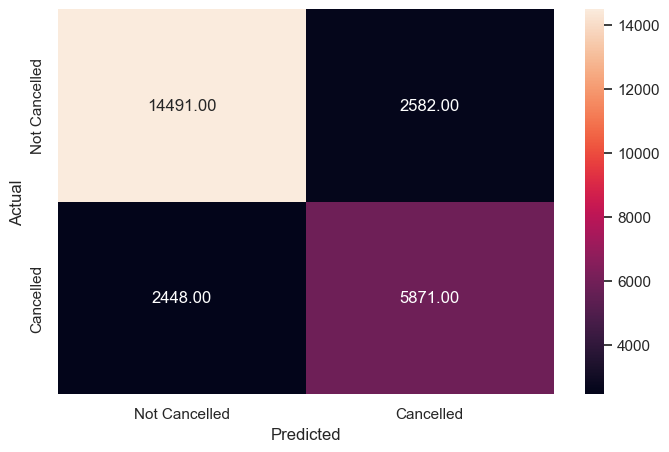

In [171]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

- At the optimal threshold of .40, the model performance has improved considerably.
- The recall has improved from 0.65 to .71 which is a slight increase.

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7317
           1       0.72      0.73      0.72      3566

    accuracy                           0.82     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.82      0.82      0.82     10883



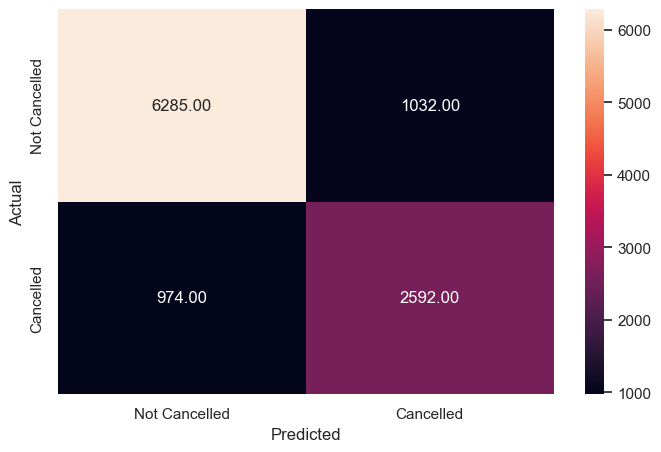

In [174]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

- The recall has improved from 0.61 to .73 which is a ~12% increase which will give better results.
- Moreover, the kernel used is rbf, so the model performs well with a non-linear kernel.

In [186]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and fit the Bagging Classifier
dt = DecisionTreeClassifier(min_samples_split=10,random_state=42)

# Fit the Bagging Classifier to the training data
dt.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt.predict(X_test)

# Evaluating the model
print("Accuracy (Decision Tree Classifier):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree Classifier):\n", classification_report(y_test, y_pred_dt))

Accuracy (Decision Tree Classifier): 0.867815299793246

Classification Report (Decision Tree Classifier):
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      4839
           1       0.81      0.79      0.80      2416

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255



- As we  can see **Decision tree** has an accuracy of **87%** and it gives a high precision and recall for both class 0 and class 1 variables.

## Conclusion

- We saw that mostly **Online bookings** were getting cancelled due to **high prices**. The company should manage the prices efficiently and if possible it should be same as offline bookings. They can also give some discounts in online bookings. This can reduce the number of online cancellations and promote online bookings.
- The organization should focus on **new customers** as repeated customers had very few cancellations, they can **give some offers only for new customers and benefits. Offers and benefits attracts more new customers.**
- Also the chances of cancellation increase as the **number of days the customer planned to stay at the hotel increases**, so the hotel can provide some discounts for a long term stay to customers or a long term package to customers.
- We can promote **Loyalty program and issue memberships to customers** which will give us an income from the memberships sold and also the complimentary rooms can be given as a part of the loyalty program. The **loyalty points will be calculated as per the visits** and after they reach a certain value/limit, we reward our guests with something.It will play a major role in alluring customers to visit more frequent and cancellations will be decreased.
- **Prices are high during May to September**, if prices are kept average during this period it can reduce cancellations and bring in more people to accomodate the hotel.
- At last we can also give some **weekend related proposals** as majority of people travel on weekends.